In [598]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [599]:
df = pd.read_csv('2005-21-local-authority-ghg-emissions-csv-dataset-update-060723.csv')

In [600]:
#Exploratory Data Analysis
dfcopy = df.copy()
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523643 entries, 0 to 523642
Data columns (total 15 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   Country                                                       523643 non-null  object 
 1   Country Code                                                  523252 non-null  object 
 2   Region                                                        523643 non-null  object 
 3   Region Code                                                   523252 non-null  object 
 4   Second Tier Authority                                         523252 non-null  object 
 5   Local Authority                                               523643 non-null  object 
 6   Local Authority Code                                          523643 non-null  object 
 7   Calendar Year                                           

In [601]:
summary_statistics = dfcopy.describe()
summary_statistics

,Calendar Year,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2e),Mid-year Population (thousands),Area (km2)
count,523643.000000,523643.000000,523643.000000,523252.000000,523252.000000
mean,2012.990165,16.735608,11.667059,172.280987,672.717952
std,4.903620,95.020150,47.754202,116.207341,1653.913152
min,2005.000000,-2892.135515,0.000000,2.210000,3.149600
25%,2009.000000,0.035900,0.000000,100.089504,98.346600
50%,2013.000000,0.488963,0.000000,136.683000,279.328000
75%,2017.000000,4.660390,0.000000,211.722349,680.083400
max,2021.000000,10542.349240,4027.532936,1157.158139,26473.949600


In [602]:
#Drop unnecessary columns
unnecessray_columns = ['Country Code', 'Region Code', 'Second Tier Authority',
                       'Local Authority Code', 'CO2 emissions within the scope of influence of LAs (kt CO2e)']
dfcopy.drop(columns=unnecessray_columns, inplace=True)

In [603]:
#Drop duplicates
dfcopy.drop_duplicates(inplace = True)

In [209]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523643 entries, 0 to 523642
Data columns (total 10 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Country                          523643 non-null  object 
 1   Region                           523643 non-null  object 
 2   Local Authority                  523643 non-null  object 
 3   Calendar Year                    523643 non-null  int64  
 4   LA GHG Sector                    523643 non-null  object 
 5   LA GHG Sub-sector                523643 non-null  object 
 6   Greenhouse gas                   523643 non-null  object 
 7   Territorial emissions (kt CO2e)  523643 non-null  float64
 8   Mid-year Population (thousands)  523252 non-null  float64
 9   Area (km2)                       523252 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 43.9+ MB


In [604]:
#Check null values
dfcopy.isnull().sum()

Country                              0
Region                               0
Local Authority                      0
Calendar Year                        0
LA GHG Sector                        0
LA GHG Sub-sector                    0
Greenhouse gas                       0
Territorial emissions (kt CO2e)      0
Mid-year Population (thousands)    391
Area (km2)                         391
dtype: int64

In [605]:
#Before dropping null values check the summary statistics with and without null values

In [606]:
#dfcopy without null values
dfcopy_no_null = dfcopy.dropna()
dfcopy_no_null.describe()

,Calendar Year,Territorial emissions (kt CO2e),Mid-year Population (thousands),Area (km2)
count,523252.000000,523252.000000,523252.000000,523252.000000
mean,2012.990158,16.612428,172.280987,672.717952
std,4.903623,89.457949,116.207341,1653.913152
min,2005.000000,-2153.073660,2.210000,3.149600
25%,2009.000000,0.035900,100.089504,98.346600
50%,2013.000000,0.488482,136.683000,279.328000
75%,2017.000000,4.651007,211.722349,680.083400
max,2021.000000,9554.950276,1157.158139,26473.949600


In [607]:
#There is no significant change in the summary statistics of the data after dropping null values and the number 
#of null values is so small we can drop null values 

dfcopy.dropna(inplace = True)

Text(0.5, 1.0, 'Emission Trend Over Years')

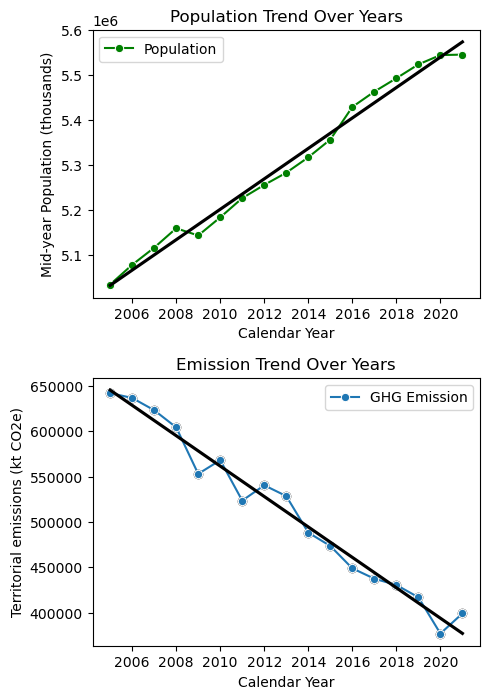

In [729]:
#Trends in population and the net amount of GHG emissions (when aggregating GHG emissions, it is important to consider
#that there a negaitve values which means decrease)

dfgroupedpopulation = dfcopy.groupby(['Calendar Year'])['Mid-year Population (thousands)'].sum().reset_index()
dfgroupedghg = dfcopy.groupby(['Calendar Year'])['Territorial emissions (kt CO2e)'].sum().reset_index()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 8))
plt.subplots_adjust(hspace=0.3)

sns.lineplot(x='Calendar Year', y='Mid-year Population (thousands)', data=dfgroupedpopulation, marker='o', 
             label='Population', errorbar=None, color='green', ax=axes[0])
sns.regplot(x='Calendar Year', y='Mid-year Population (thousands)', data=dfgroupedpopulation, scatter=None, 
            ci=None, color='black', ax=axes[0])
axes[0].set_title('Population Trend Over Years')

sns.lineplot(x='Calendar Year', y='Territorial emissions (kt CO2e)', data=dfgroupedghg, marker='o', 
             label='GHG Emission', errorbar=None, ax=axes[1])
sns.regplot(x='Calendar Year', y='Territorial emissions (kt CO2e)', data=dfgroupedghg, scatter=True, 
            ci=None, color='black', ax=axes[1])
axes[1].set_title('Emission Trend Over Years')


In [613]:
#Additional analysis
#Following graphs include years between 2016 and 2021

startyear = 2016
endyear = 2021

#By country
dfgroupedcountry_net = dfcopy.groupby(['Calendar Year','Country'])['Territorial emissions (kt CO2e)'].sum().reset_index()
dfgroupedcountry_net = dfgroupedcountry_net[(dfgroupedcountry_net['Calendar Year'] >= startyear) 
                                            & (dfgroupedcountry_net['Calendar Year'] <= endyear)]
#By sector
dfgroupedsector_net = dfcopy.groupby(['Calendar Year','LA GHG Sector'])['Territorial emissions (kt CO2e)'].sum().reset_index()
dfgroupedsector_net = dfgroupedsector_net[(dfgroupedsector_net['Calendar Year'] >= startyear) 
                                          & (dfgroupedsector_net['Calendar Year'] <= endyear)]
#Selecting the top three sectors that contribute the most to emissions
dfgroupedsector_net = dfgroupedsector_net[dfgroupedsector_net['LA GHG Sector'].isin(['Transport', 'Domestic', 'Industry'])]

#By GHG gas
dfgroupedgas_net = dfcopy.groupby(['Calendar Year','Greenhouse gas'])['Territorial emissions (kt CO2e)'].sum().reset_index()
dfgroupedgas_net = dfgroupedgas_net[(dfgroupedgas_net['Calendar Year'] >= startyear) 
                                    & (dfgroupedgas_net['Calendar Year'] <= endyear)]


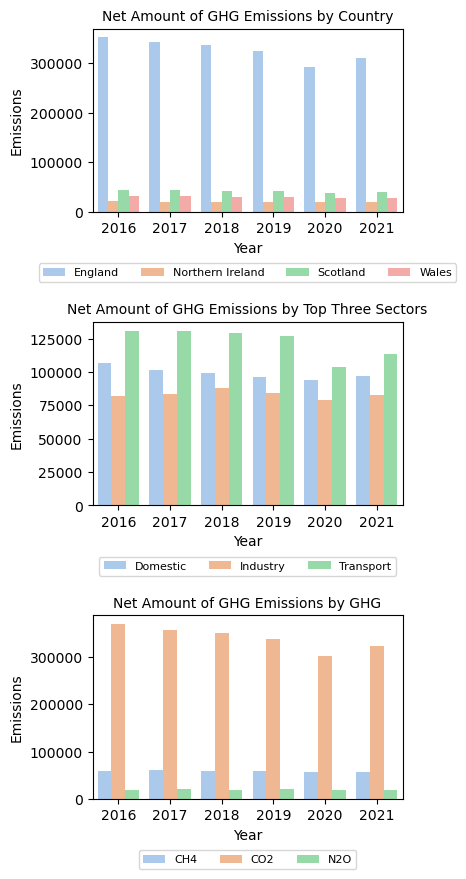

In [767]:

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(4, 10))
plt.subplots_adjust(hspace=0.6)

custom_palette = sns.color_palette("pastel")
sns.barplot(x='Calendar Year', y='Territorial emissions (kt CO2e)', hue='Country', data=dfgroupedcountry_net, 
            palette=custom_palette, ax=axes[0])
axes[0].set_title('Net Amount of GHG Emissions by Country', fontsize=10)
axes[0].legend(loc='upper center', fontsize=8, bbox_to_anchor=(0.5, -0.25), 
               ncol=len(dfgroupedcountry_net['Country'].unique()))
axes[0].set_ylabel('Emissions', fontsize=10)
axes[0].set_xlabel('Year', fontsize=10)
axes[0].tick_params(axis='x', labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

sns.barplot(x='Calendar Year', y='Territorial emissions (kt CO2e)', hue='LA GHG Sector', 
            data=dfgroupedsector_net, palette=custom_palette, ax=axes[1])
axes[1].set_title('Net Amount of GHG Emissions by Top Three Sectors', fontsize=10)
axes[1].legend(loc='upper center', fontsize=8, bbox_to_anchor=(0.5, -0.25), 
               ncol=len(dfgroupedsector_net['Calendar Year'].unique()))
axes[1].set_ylabel('Emissions', fontsize=10)
axes[1].set_xlabel('Year', fontsize=10)
axes[1].tick_params(axis='x', labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

sns.barplot(x='Calendar Year', y='Territorial emissions (kt CO2e)', hue='Greenhouse gas', 
            data=dfgroupedgas_net, palette=custom_palette, ax=axes[2])
axes[2].set_title('Net Amount of GHG Emissions by GHG', fontsize=10)
axes[2].legend(loc='upper center', fontsize=8, bbox_to_anchor=(0.5, -0.25), 
               ncol=len(dfgroupedgas_net['Calendar Year'].unique()))
axes[2].set_ylabel('Emissions', fontsize=10)
axes[2].set_xlabel('Year', fontsize=10)
axes[2].tick_params(axis='x', labelsize=10)
axes[2].tick_params(axis='y', labelsize=10)

Text(0, 0.5, 'Co2Intensity')

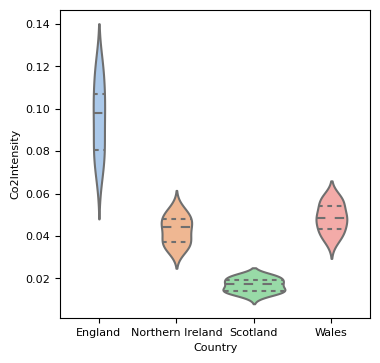

In [768]:
#Calculating CO2 Intensity
#Distribution of CO2 Intensity for Each Country

co2intensity = dfcopy[['Calendar Year', 'Country', 'Area (km2)', 'Territorial emissions (kt CO2e)', 'Greenhouse gas']]
co2intensity = co2intensity[co2intensity['Greenhouse gas'] == 'CO2']
groupedco2intensity = co2intensity.groupby(['Calendar Year', 'Country']).sum().reset_index()
groupedco2intensity['Co2Intensity'] = groupedco2intensity['Territorial emissions (kt CO2e)'] / groupedco2intensity['Area (km2)']
groupedco2intensity

plt.figure(figsize=(4, 4))
sns.violinplot(x='Country', y='Co2Intensity', data=groupedco2intensity, palette='pastel', inner='quartile')
plt.xticks(fontsize=8)  
plt.yticks(fontsize=8)
plt.xlabel('Country',fontsize=8) 
plt.ylabel('Co2Intensity', fontsize=8)

In [769]:
#Applying the Decision Tree classifier to identify whether a region is a greenhouse gas hotspot

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

dfclass = dfcopy.groupby(['Region', 'Local Authority',
                         'LA GHG Sector', 'Greenhouse gas'])['Territorial emissions (kt CO2e)'].sum().reset_index()

#Defining a target with binary values (0 : No, 1 : Yes) by considering mean value of net emissions

dfclass['IsHotspot'] = (dfclass['Territorial emissions (kt CO2e)'] > dfclass['Territorial emissions (kt CO2e)'].mean()).astype(int)

feature_selection = ['Region', 'Local Authority', 'LA GHG Sector', 'Greenhouse gas']

target_selection = 'IsHotspot'

X = dfclass[feature_selection]
y = dfclass[target_selection]

#Encoding categorical variables

encoding = OneHotEncoder(sparse=False, drop='first', handle_unknown='error')  
encodedx = pd.DataFrame(encoding.fit_transform(X), columns=encoding.get_feature_names_out(feature_selection))

X_train, X_test, y_train, y_test = train_test_split(encodedx, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=10)

#Fitting train set in Decision Tree model
dt_classifier.fit(X_train, y_train)

prediction = dt_classifier.predict(X_test)

#Evaulating the model performance
accuracy = accuracy_score(y_test, prediction)

accuracy

0.920935412026726

Text(20.72222222222222, 0.5, 'Actual')

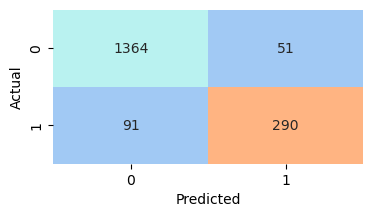

In [770]:
#Visualizing confusion matrix

conf_matrix = confusion_matrix(y_test, prediction)

custom_palette = sns.color_palette("pastel")
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_palette, cbar=False,
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')


Text(0, 0.5, 'Feature')

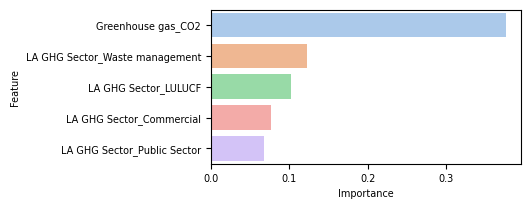

In [715]:
#Defining the feature which has the highest importance on target

feature_importance = dt_classifier.feature_importances_
featurename = encodedx.columns

ghg_importance = pd.DataFrame({'Feature': featurename, 'Importance': feature_importance})
ghg_importance = ghg_importance.sort_values(by='Importance', ascending=False)

feature_importance = pd.DataFrame({'Feature': featurename, 'Importance': feature_importance})

top5importance = 5
result = feature_importance.nlargest(top5importance, 'Importance')


result
custom_palette = sns.color_palette("pastel", as_cmap=True)
plt.figure(figsize=(4, 2))
sns.barplot(x='Importance', y='Feature', data=result, palette=custom_palette)
plt.xticks(fontsize=7)  
plt.yticks(fontsize=7)
plt.xlabel('Importance',fontsize=7) 
plt.ylabel('Feature', fontsize=7)